In [91]:
# Exercise 1: Preparing data for linear regression model
import pandas as pd
import seaborn as sbs
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import shapiro
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


#  load the data 

In [93]:
df = pd.read_csv('house-data.csv')


In [94]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [95]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [96]:
list(df)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [97]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [98]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [99]:
# will drop the date since it is an object and not so informative
drop_date = df.drop(columns="date")



In [100]:


#
corr_matrix = drop_date.corr()
print(corr_matrix['price'].sort_values(ascending=False))  # Tjek korrelation med pris


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [101]:
# after seeing the cor results will drop unnecessary columns
df_cleaned = df.drop(columns=['id', 'zipcode', 'sqft_lot', 'sqft_lot15', 'yr_built', 'condition', 'long'])


In [102]:
df_cleaned.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340
1,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690
2,20150225T000000,180000.0,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720
3,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360
4,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800


In [103]:
# Define the correlation threshold
threshold = 0.5

# Get the correlation values with 'price'
price_corr = corr_matrix['price']

# Find which correlations are higher than the threshold
high_corr_with_price = price_corr[abs(price_corr) > threshold]
print(high_corr_with_price)

price            1.000000
bathrooms        0.525138
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
Name: price, dtype: float64


### regression models – linear, multiple linear,
polynomial, and compare their accuracy in prediction.

In [105]:

#drop the target columns 
high_corr_with_price = high_corr_with_price.drop('price')

# Extract the feature names with high correlation

high_corr_features = high_corr_with_price.index
# Create a new DataFrame with only these high correlation features for future predictions with only high corr arttributes
df_with_high_corr = df[high_corr_features]


In [106]:
X = df_with_high_corr
y = df['price']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [126]:
X.shape

(21613, 5)

In [130]:
X_train.shape

(17290, 5)

In [132]:
X_test.shape

(4323, 5)

In [134]:
model = LinearRegression()

In [136]:
model.fit(X_train, y_train)


LinearRegression()

In [138]:

#intercept b in y = ax+b
intercept = model.intercept_
intercept

-632600.0025421507

In [140]:
# extract the coefficient
coefficient = model.coef_
coefficient

array([-3.17052494e+04,  2.44972877e+02,  1.08349319e+05, -8.13456415e+01,
        2.28602212e+01])

In [154]:
print ('price = {0:0.2f} + ({1: 0.2f} x X)'.format(intercept, coefficient[0]))


price = -632600.00 + (-31705.25 x X)


In [156]:
# generate predictions on the test data
y_predictions = model.predict(X_test)

y_predictions

array([ 556202.04449467,  754816.34518093, 1181665.48178165, ...,
        608841.89572871,  593735.0964376 ,  631003.7589187 ])

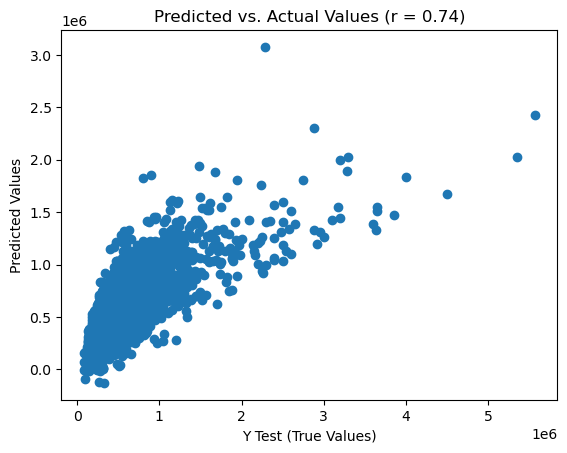

In [158]:
plt.scatter(y_test, y_predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (r = {0:0.2f})'.format(pearsonr(y_test, y_predictions)[0], 2))
plt.show()

In [160]:
print("Range of y_test:", min(y_test), "to", max(y_test))
print("Range of y_predictions:", min(y_predictions), "to", max(y_predictions))


Range of y_test: 82500.0 to 5570000.0
Range of y_predictions: -128690.83401510469 to 3076292.174793166


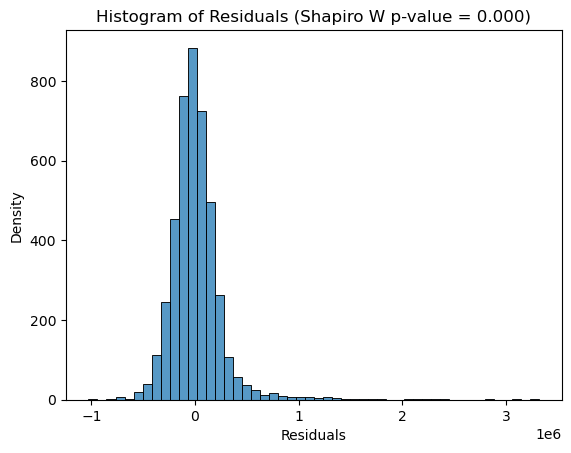

In [170]:
sns.histplot((y_test - y_predictions), bins = 50)
plt.xlabel('Residuals') # Residuals means error... or the difference
plt.ylabel('Density')
plt.title('Histogram of Residuals (Shapiro W p-value = {0:0.3f})'.format(shapiro(y_test - y_predictions)[1]))
plt.show()

In [172]:
# compute metrics and put into a dataframe
metrics_df = pd.DataFrame({'Metric': ['MAE', 
                                      'MSE', 
                                      'RMSE', 
                                      'R-Squared'],
                          'Value': [metrics.mean_absolute_error(y_test, y_predictions),
                                    metrics.mean_squared_error(y_test, y_predictions),
                                    np.sqrt(metrics.mean_squared_error(y_test, y_predictions)),
                                    metrics.explained_variance_score(y_test, y_predictions)]}).round(3)
print(metrics_df)

      Metric         Value
0        MAE  1.645028e+05
1        MSE  6.832588e+10
2       RMSE  2.613922e+05
3  R-Squared  5.480000e-01


# Multiple linar regression